# Fundamentals of Machine Learning - Exercise 4(a)
Deadline: 12.01.2021, 16:00

Johannes Kammerer, Zhao Sun, Tong Yu

In [1]:
import pandas as pd                                    
import numpy as np                                      
import matplotlib.pyplot as plt         
%matplotlib inline
import seaborn as sns
from IPython.display import display, Markdown, Latex

## Red Cards Study
### 1. Loading and Cleaning the Data (10 points)


- What do the feature names (e.g. column games) stand for?
- Which irrelevant features might be dropped?
- What relevant features might be missing, but can be computed? E.g., you can obtain the age of a player (which might be relevant) from his birthday, or create entirely new features by non-linear combinations of existing ones.
- Are there missing data values (e.g. missing skin color ratings), and how should they be dealt with? (see https://en.wikipedia.org/wiki/Missing_data)
- How good are the skin color ratings? Do the raters agree?
- Should referees with very few appearances be excluded from the dataset?
- Should features be normalized and/or centralized? 

Categorical features (e.g. league) should be transformed to a one-hot encoding (see https://en.wikipedia.org/wiki/One-hot). In case of league, you can also repreat the experiment independently for the different leagues to check if there are differences between countries. Provide a detailed description and justification of your data preparation.

In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')

# set options to display full range of columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

display(df.columns, df.size, df.head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

4088784

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


Num of dyads with missing photos = 21407 (14.659517% of total dyads) 

Num of players with missing photos = 468 (23.008850% of unique players) 

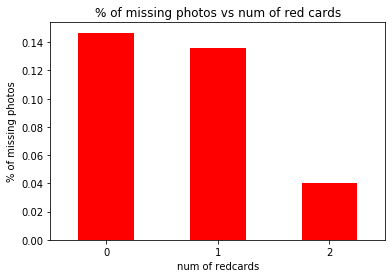

% of redCards (all) = 1.238804% vs. <br>% of redCards (without photos) = 1.139814%

As evidenced above, we can assume the missing photos are at random and therefore treat missing values by omission, i.e. dropping all NaNs from dataset.

In [312]:
# Consider missing photos
df['redCards'].value_counts() #144219 #1784 #25
df['redCards'][df.photoID.isna()].value_counts() #21163 #243 #1

display(Markdown("Num of dyads with missing photos = {} ({:%} of total dyads) ".format(len(df['redCards'][df.photoID.isna()]), len(df['redCards'][df.photoID.isna()])/len(df['redCards']))))

display(Markdown("Num of players with missing photos = {} ({:%} of unique players) ".format(len(df['player'][df.photoID.isna()].unique()),len(df['player'][df.photoID.isna()].unique())/len(df['player'].unique()))))


(df['redCards'][df.photoID.isna()].value_counts() / df['redCards'].value_counts()).plot.bar(rot=0, color='red')
plt.title("% of missing photos vs num of red cards"), plt.xlabel('num of redcards'), plt.ylabel('% of missing photos')
plt.show()

display(Markdown('% of redCards (all) = {:%} vs. <br>% of redCards (without photos) = {:%}'.format(df['redCards'][df.redCards!=0].count() / df['redCards'].count(), df['redCards'][df.photoID.isna()][df.redCards!=0].count() / df['redCards'][df.photoID.isna()].count())))
display(Markdown('As evidenced above, we can assume the missing photos are at random and therefore treat missing values by omission, i.e. dropping all NaNs from dataset.'))


<font color=green> **COMMENTS:** 
    We have found the same number of missing photos which means we have loaded the raw data successfully.

</font>

Observation: c. 2/3 of all referees were involved in less than 22 dyads, i.e. not full game information

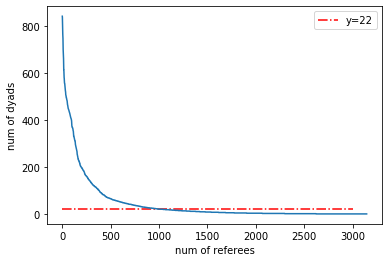

% of referees who has at least 22 dyads = 31.712742%

% of dyads with referees who has at least 22 dyads = 91.421508%

% of red cards issues by referees with at least 22 dyads:

0    0.913846
1    0.942825
2    1.000000
Name: redCards, dtype: float64

**However, if we do not consider referee as a particular feature of the player, then we should not exclude any referee.**

In [417]:
# Consider referees with few games
display(Markdown("Observation: c. 2/3 of all referees were involved in less than 22 dyads, i.e. not full game information"))
plt.plot(-np.sort(-df.refNum.value_counts())) # sort by descending order
plt.hlines(y = 22, xmin=0, xmax=3000,colors='red', linestyles='dashdot', label='y=22', )
plt.xlabel('num of referees')
plt.ylabel('num of dyads')
plt.legend()
plt.show()

refNum22 = df.refNum.value_counts()[df.refNum.value_counts()>=22].index
display(Markdown('% of referees who has at least 22 dyads = {:%}'.format(len(refNum22) / len(df.refNum.unique()))))
display(Markdown('% of dyads with referees who has at least 22 dyads = {:%}'.format(df.refNum.isin(refNum22).sum() / len(df.refNum))))

display(Markdown('% of red cards issues by referees with at least 22 dyads:'))
display(df.redCards[df.refNum.isin(refNum22)].value_counts() / df.redCards.value_counts())

display(Markdown("**However, if we do not consider referee as a particular feature of the player, then we should not exclude any referee.**"))


<font color=green> **COMMENTS:** 
    Like the solution provided, we have also concluded that referees and the related statistical features are irrelevant for our analysis and therefore they are excluded from the subsquent procedures.
    
We selected mostly similar features as the solution provided, with the exceptions of yellowCards, as we believed that it might be a relevant feature: a yellow card might be leading to a red card or might deter players from getting a red card [to be investigated].
    

</font>

In [37]:
df_1 = df[['playerShort','games','victories','ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']].groupby(by="playerShort").sum()

df_2 = df[['playerShort','rater1', 'rater2','club', 'leagueCountry', 'birthday', 'height', 'weight', 'position',]].groupby(by="playerShort").first()
df_ = df_1.join(df_2) #.dropna() #2053 rows × 16 columns --> 1419 rows × 16 columns

df_.isna().sum()


games            0  
victories        0  
ties             0  
defeats          0  
goals            0  
yellowCards      0  
yellowReds       0  
redCards         0  
rater1           468
rater2           468
club             0  
leagueCountry    0  
birthday         0  
height           20 
weight           80 
position         367
dtype: int64

<font color=green> **COMMENTS:** 
-     Exactly like the solution provided, we grouped our data by 'playerShort' and took the sum of the variable features such as num of games, victories, redCards, etc. while using one-hot coding for the categorical static features.
-     In addition, we also just took the simple average of the two skinColor ratings.
    

</font>

**Selecting relevant features and group-by players**

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,club,leagueCountry,birthday,height,weight,position
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,654,247,179,228,9,19,0,0,0.25,0.00,Fulham FC,England,08.11.1979,182.0,71.0,Center Back
aaron-hunt,336,141,73,122,62,42,0,1,0.00,0.25,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder
aaron-lennon,412,200,97,115,31,11,0,0,0.25,0.25,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder


**Overview of missing data after grouping by players**

games            0  
victories        0  
ties             0  
defeats          0  
goals            0  
yellowCards      0  
yellowReds       0  
redCards         0  
rater1           468
rater2           468
club             0  
leagueCountry    0  
birthday         0  
height           20 
weight           80 
position         367
dtype: int64

num of players with missing photos (removed) = 468 (22.8% of unique players) 

**Overview after removing all #NaN**

num of unique players: 1419 (69.1% of total 2053)

num of clubs: 92 (78.0% of total 118)

league countries: ['England' 'Germany' 'France' 'Spain'] (100.0% of total 4)

num of positions: 12 ['Center Back' 'Attacking Midfielder' 'Right Midfielder'
 'Center Midfielder' 'Goalkeeper' 'Defensive Midfielder' 'Left Fullback'
 'Left Midfielder' 'Right Fullback' 'Center Forward' 'Left Winger'
 'Right Winger']

position excluded from original dataset:

nan


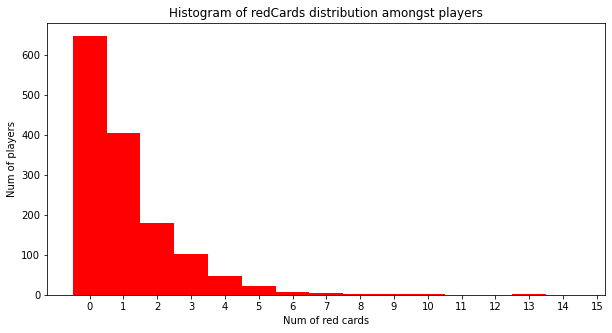

In [66]:
# Preprocessing: removing NAN and keeping only revelant features

relevant_features = ['playerShort', 'club', 'leagueCountry', 'birthday', 'height', 'weight', 'position', 
                     'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2']

#df1 = df[relevant_features][df.refNum.isin(refNum22)].dropna().drop_duplicates() #len(df1) #146028 --dropna #115603 -- drop_duplicates #115603
#df1 = df[relevant_features].dropna().drop_duplicates()

df1 = df[['playerShort','games','victories','ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']].groupby(by="playerShort").sum()
df1 = df1.join(df[['playerShort','rater1', 'rater2','club', 'leagueCountry', 'birthday', 'height', 'weight', 'position',]].groupby(by="playerShort").first())
display(Markdown('**Selecting relevant features and group-by players**'))
display(df1.head(3))
display(Markdown('**Overview of missing data after grouping by players**'))
display(df1.isna().sum())
display(Markdown("num of players with missing photos (removed) = {} ({:.1%} of unique players) ".format(len(df['playerShort'][df.photoID.isna()].unique()),len(df['playerShort'][df.photoID.isna()].unique())/len(df['playerShort'].unique()))))

df1 = df1.dropna()

display(Markdown('**Overview after removing all #NaN**'))
#display(Markdown("num of referees: {} ({:%} of total)".format(len(df1.refNum.value_counts()), len(df1.refNum.unique())/len(df.refNum.unique())))) #2904
#display(Markdown("num of referee countries: {}".format(len(df1.refCountry.unique()))))
#display(Markdown("num of dyads: {} ({:%} of total)".format(len(df1), len(df1)/len(df))))

display(Markdown('num of unique players: {} ({:.1%} of total {})'.format(len(df1),len(df1)/df.playerShort.unique().size,df.playerShort.unique().size))) #1406

display(Markdown('num of clubs: {} ({:.1%} of total {})'.format(len(df1.club.value_counts()),len(df1.club.unique())/len(df.club.unique()),len(df.club.unique())))) #92 unique clubs
display(Markdown('league countries: {} ({:.1%} of total {})'.format(df1.leagueCountry.unique(),len(df1.leagueCountry.unique())/len(df.leagueCountry.unique()),len(df.leagueCountry.unique())))) #array(['Spain', 'France', 'England', 'Germany'], dtype=object)
display(Markdown("num of positions: {} {}".format(len(df1.position.unique()),df1.position.unique())))
display(Markdown("position excluded from original dataset:"))
for x in df.position.unique():
    if x not in df1.position.unique():
        print(x)

counts = np.arange(16)
plt.figure(figsize=(10,5))
plt.hist(df1.redCards,bins=counts,color='red')
plt.title("Histogram of redCards distribution amongst players")
plt.xlabel('Num of red cards')
plt.ylabel('Num of players')
plt.xticks(ticks = counts+0.5, labels = counts);

**Discrepency of skin tone ratings**

Text(0.5, 1.0, 'Delta (rater2 - rater1)')

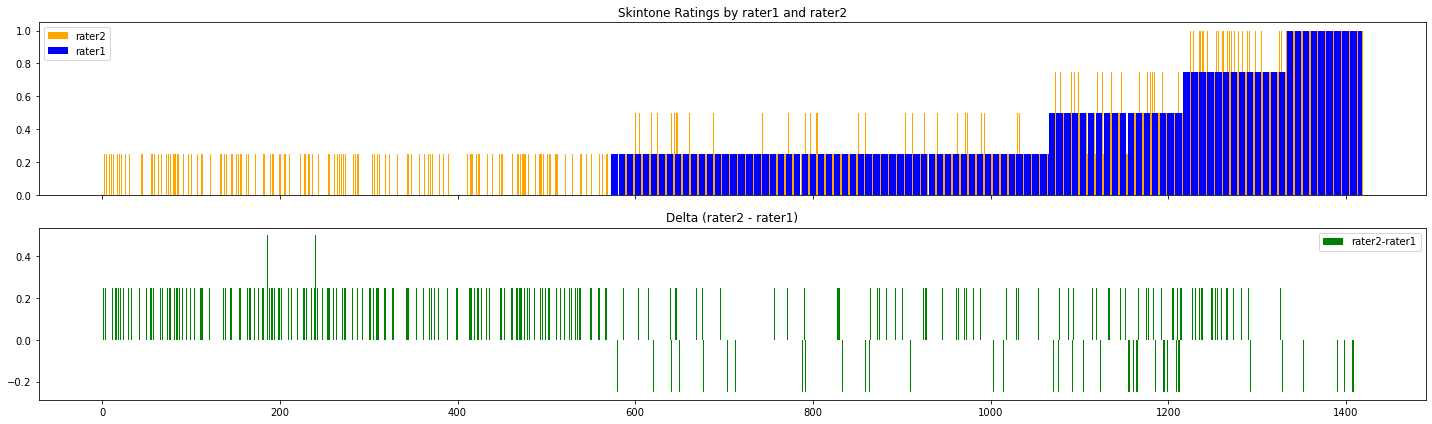

In [67]:
display(Markdown("**Discrepency of skin tone ratings**"))

df2 = df1[['rater1','rater2']].sort_values(by=['rater1'])

fig, ax = plt.subplots(2,1,sharex=True,figsize=(20,6),tight_layout = True)

ax[0].bar(x=np.arange(len(df2))+0.4, height=df2.rater2,color='orange',label='rater2')
ax[0].bar(x=np.arange(len(df2))-0.4, height=df2.rater1,color='blue',label='rater1')
ax[0].legend()
ax[0].set_title('Skintone Ratings by rater1 and rater2')

ax[1].bar(x=np.arange(len(df2))-0.4, height=df2.rater2-df2.rater1,color='green',label='rater2-rater1')
ax[1].legend()
ax[1].set_title("Delta (rater2 - rater1)")

In [186]:
# Preprocessing: Adding new features: age (as of 2013.01.01) and BMI 

import datetime
dateRef = datetime.datetime(2013,1,1)
year = datetime.timedelta(days=365)
df1['age_2013'] = (dateRef - pd.to_datetime(df1.birthday))/year
df1['BMI'] = df1.weight / np.square(df1.height/100)
df1['skinTone'] = (df1.rater1+df1.rater2)/2 

['height', 'weight','games', 'victories', 'ties', 'defeats', 'goals']


# Preprocessing: normalize data

df1[['age_n','BMI_n','skinTone_n','height_n', 'weight_n','games_n', 'victories_n', 'ties_n', 'defeats_n', 'goals_n']] = df1[['age_2013','BMI','skinTone','height', 'weight','games', 'victories', 'ties', 'defeats', 'goals']].apply(lambda x: (x.max()-x)/(x.max()-x.min()), axis=0)

#df1.skinTone =  df1.skinTone - df1.skinTone.mean()
#df1.age_2013 = df1.age_2013 - df1.age_2013.mean()
#df1.height = df1.height - df1.height.mean()
#df1.weight = df1.weight - df1.weight.mean()
#df1.BMI = df1.BMI - df1.BMI.mean()
#df1.games= df1.games = df1.game.mean()

# Preprocessing: One-hot encodeing for all categorical features

leagueCountry = pd.get_dummies(df1["leagueCountry"],prefix='country')
leagueCountry.index=df1.index #playerShort

club = pd.get_dummies(df1['club'],prefix='club')
club.index=df1.index #playerShort

position = pd.get_dummies(df1['position'], prefix='position')
position.index=df1.index #playerShort


# Combining into new dataframe
df2 = df1.join([leagueCountry, club, position])

redCards = (df2.redCards/df2.games) # Yi = Ni,red/Ni,
redCards_normalized = (redCards-redCards.min())/(redCards.max()-redCards.min())
players = df2.index
features = df2.drop(columns=['redCards','birthday','club','leagueCountry','position'])

print(f"player: {players.shape}")
print(f"redCards:{redCards_normalized.shape}")
print(f"features:{features.shape}")

player: (1419,)
redCards:(1419,)
features:(1419, 132)


<font color=green> **COMMENTS:** 
-     Similar to the solution, We have converted the birthday to age (as of 2013.01.01 rather than 2015 since most of the data were collected before 2013).
-     We also normalized data to between 0-1
    

</font>

In [194]:
df2.columns.to_list()

['games',
 'victories',
 'ties',
 'defeats',
 'goals',
 'yellowCards',
 'yellowReds',
 'redCards',
 'rater1',
 'rater2',
 'club',
 'leagueCountry',
 'birthday',
 'height',
 'weight',
 'position',
 'age_2013',
 'BMI',
 'skinTone',
 'height_n',
 'weight_n',
 'games_n',
 'victories_n',
 'ties_n',
 'defeats_n',
 'goals_n',
 'age_n',
 'BMI_n',
 'skinTone_n',
 'country_England',
 'country_France',
 'country_Germany',
 'country_Spain',
 'club_1. FC Nürnberg',
 'club_1. FSV Mainz 05',
 'club_1899 Hoffenheim',
 'club_AC Ajaccio',
 'club_AS Nancy',
 'club_AS Saint-Étienne',
 'club_Arsenal FC',
 'club_Arsenal FC (R)',
 'club_Aston Villa',
 'club_Athletic Bilbao',
 'club_Atlético Madrid',
 'club_Bayer Leverkusen',
 'club_Bayern München',
 'club_Blackburn Rovers',
 'club_Bolton Wanderers',
 'club_Bor. Mönchengladbach',
 'club_Borussia Dortmund',
 'club_CA Osasuna',
 'club_CF Badalona',
 'club_Celta Vigo',
 'club_Chelsea FC',
 'club_Crewe Alexandra',
 'club_Deportivo La Coruña',
 'club_ESTAC Troyes'

In [109]:
redCards_normalized.min(), redCards_normalized.max()

(0.0, 1.0)

### 2 Model Creation (8 points)

Given features Xi of player i, we want to predict $Y_i = N_{i,red} / N_i$, the fraction of games where the player will receive a red card. We will solve this problem using two model types: linear regression and regression forests.

Implement both models and determine their squared test errors by means of cross-validation. Alternatively (or in addition to this will result in bonus points), you can also try to predict $Y_i = p(red | X_i)$ via the posterior of a classification model.

<font color=green> **COMMENTS:** 
-     We used the same LinearRegression() model from sklearn lib and the RegressionTree() class as the solution.
-     The solution implemented a customized cross validation procedure k_fold_cv(), whereas we just used the cross_val_predict from sklearn lib
-     We only managed to run the models on a limited set of features as the training of full set of features took too long to complete - we suspect it is due to the inefficient code implementation    

</font>

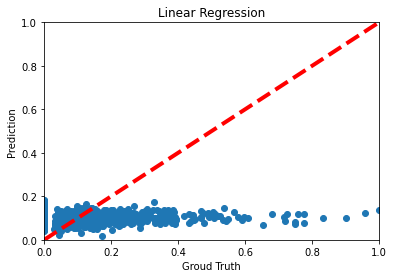

Linear Regression - features=['skinTone_n', 'age_n', 'BMI_n', 'height_n', 'weight_n', 'games_n', 'goals_n']


In [199]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

LR_model = LinearRegression()

#LR_model.fit(X=features, y =redCards)
#LR_MSE = np.square(LR_model.predict(X=features) - redCards).sum()
#display(Markdown('Linear Regression MSE score = {:f}'.format(LR_MSE)))

#prediction = LR_model.predict(X=features)
#plt.plot(prediction-redCards,color='blue',marker='.',linewidth=0)
#plt.title("Linear Regression - delta between prediction and actual")
#plt.xlabel('player index')
#plt.ylabel('$N_{i,red} / N_i$')

selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n']

predicted = cross_val_predict(LR_model, X = features[selected].to_numpy(), y = redCards_normalized.to_numpy(), cv=10)

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predicted) #, edgecolors=(0, 0, 0)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Linear Regression")
plt.show()

print("Linear Regression - features={}".format(selected))

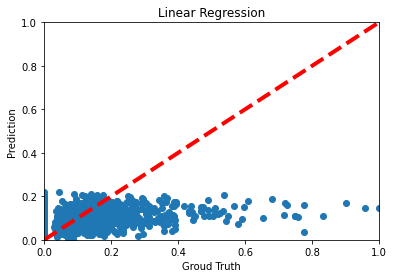

Linear Regression - features=['skinTone_n', 'age_n', 'BMI_n', 'height_n', 'weight_n', 'games_n', 'goals_n', 'country_England', 'country_France', 'country_Germany', 'country_Spain', 'position_Attacking Midfielder', 'position_Center Back', 'position_Center Forward', 'position_Center Midfielder', 'position_Defensive Midfielder', 'position_Goalkeeper', 'position_Left Fullback', 'position_Left Midfielder', 'position_Left Winger', 'position_Right Fullback', 'position_Right Midfielder', 'position_Right Winger']


In [200]:
selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n',
            'country_England','country_France','country_Germany','country_Spain',
           'position_Attacking Midfielder', 'position_Center Back', 'position_Center Forward', 'position_Center Midfielder','position_Defensive Midfielder', 'position_Goalkeeper', 'position_Left Fullback', 'position_Left Midfielder', 'position_Left Winger', 'position_Right Fullback', 'position_Right Midfielder', 'position_Right Winger']

predicted = cross_val_predict(LR_model, X = features[selected].to_numpy(), y = redCards_normalized.to_numpy(), cv=10)

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predicted) #, edgecolors=(0, 0, 0)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Linear Regression")
plt.show()
print("Linear Regression - features={}".format(selected))


In [201]:
# Regression Tree and Regression Forest

class Node:
    def __init__(self):
        pass 

class Tree:
    def __init__(self):
        self.root = Node()
    
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"): # leaf node has no 'feature' attribute
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

    
class RegressionTree(Tree):
    
    def __init__(self):
        super(RegressionTree, self).__init__()
        
    def train(self, data, labels, n_min=20):
        '''
        data: the feature matrix for all players
        labels: the corresponding ground-truth whether the player has received red card(s)
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
            
        D_try = int(np.sqrt(D))    # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels        
        stack = [self.root]        # put root in stack
        
        while len(stack): 
            node = stack.pop()     # check the last node on the stack
            n = node.data.shape[0] # number of instances in present node
            # note: when only 1 data point the shape is reduced to 1
            #print('>>>>', n,node.data.shape)
            
            if(n >= n_min and len(node.data.shape)==2): # need to separate node with single datapoint
                # Call 'make_decision_split_node()' with 'D_try' randomly selected feature indices. 
                # This turns 'node' into a split node and returns the two children, which must be placed on the 'stack'.
                feature_indices = np.random.permutation(D)[:D_try]
                left, right = make_decision_split_node(node, feature_indices)
                
                # put children in stack
                stack.append(left)
                stack.append(right)
            else:
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                make_decision_leaf_node(node)
                
                
    def predict(self, x): # here x is single data point        
        leaf = self.find_leaf(x)
        return leaf.response 
    

    
def calc_sse(labels):
    "Calculate the sum of squared errors between ground truth and prediction"
    sse = np.square(labels - labels.mean()).sum()
    return sse



def make_decision_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    try:
        n, D = node.data.shape
    except:
        print(node.data.shape, node.data)
        print(node.labels)
        
    # find best feature j (among 'feature_indices') and best threshold t for the split
    j_min, t_min = 0, 0
    
    sse_parent = calc_sse(node.labels)
    sse_min = sse_parent
    left_min = 0
    right_min = [i for i in range(len(node.labels))]
    
    for j in feature_indices:
        # Hint: For each feature considered, first remove duplicate feature values using 'np.unique()'. 
        # Describe here why this is necessary --> this reduces the computation of looping over all training data to test all the mid-points in-between, where a lot of these pixels are of the same values
        data_unique = np.sort(np.unique(node.data[:, j]))
        
        # Compute candidate thresholds
        tj = 0.5*(data_unique[1:]+data_unique[:-1])
        
        # Illustration: for loop - hint: vectorized version is possible
        for t in tj:
            left_indices = node.data[:, j] <= t 
            right_indices = node.data[:, j] > t
            
            # Compute the sse scores for children
            sse_left = calc_sse(node.labels[left_indices])
            sse_right = calc_sse(node.labels[right_indices])
            
            # choose the best threshold with minimize the sum of children's sse scores
            if (sse_left + sse_right) < sse_min :
                sse_min = sse_left + sse_right
                j_min = j
                t_min = t
                left_min = left_indices
                right_min = right_indices
        
    # create children
    left = Node()
    right = Node()

    # initialize 'left' and 'right' with the data subsets and labels according to the optimal split found above
    left.data = node.data[left_min,:] # data in left node
    left.labels = node.labels[left_min] # corresponding labels
    right.data = node.data[right_min,:]
    right.labels = node.labels[right_min]

    # turn the current 'node' into a split node (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    return left, right    



def make_decision_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    # compute and store leaf response
    node.N = node.labels.size

    # The response of leaf bl is the average response of the training instances assigned to this leaf
    node.response = node.labels.mean()
    


class RegressionForest():
    
    def __init__(self, n_trees):
        # create ensemble
        self.trees = [RegressionTree() for i in range(n_trees)]
        self.n_trees = n_trees
    
    def train(self, data, labels, n_min=0):
        N_total = len(labels)
        N_subset = int(0.368*N_total)
        for tree in self.trees:
            # train each tree, using a bootstrap sample of the data
            bootstrap_indices = np.random.permutation(N_total)[:N_subset]
            tree.train(data[bootstrap_indices], labels[bootstrap_indices])
            
    def predict(self, x):
        # compute the ensemble prediction
        result = np.mean([tree.predict(x) for tree in self.trees], axis=0)
        return result 

(1419, 7)

(1419,)

'selected features: '

['skinTone_n', 'age_n', 'BMI_n', 'height_n', 'weight_n', 'games_n', 'goals_n']

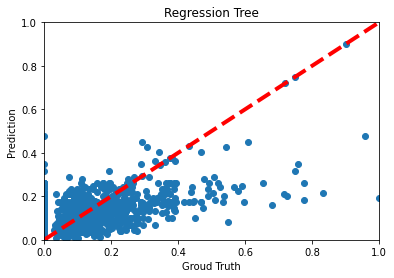

In [202]:
selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n']

data = features[selected].to_numpy()
labels = redCards_normalized.to_numpy()

#display(data.shape, labels.shape)

tree = RegressionTree()
tree.train(data, labels)

predictions = [tree.predict(x) for x in data]

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predictions)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Regression Tree")

display("selected features: ", selected)

In [203]:
# note: this takes a long time to run... has to interrupt

selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n',
            'country_England','country_France','country_Germany','country_Spain',
           'position_Attacking Midfielder', 'position_Center Back', 'position_Center Forward', 'position_Center Midfielder','position_Defensive Midfielder', 'position_Goalkeeper', 'position_Left Fullback', 'position_Left Midfielder', 'position_Left Winger', 'position_Right Fullback', 'position_Right Midfielder', 'position_Right Winger']

data = features[selected].to_numpy()
labels = redCards_normalized.to_numpy()

#display(data.shape, labels.shape)

tree = RegressionTree()
tree.train(data, labels)

predictions = [tree.predict(x) for x in data]

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predictions)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Regression Tree - more features")

display("selected features: ", selected)

KeyboardInterrupt: 

<font color=green> **COMMENTS:** 
-     We did not create a dataset class as per the solution suggested - in hindsight, we definitely should, in order to make things more managable for later analysis
-     However, we think we did most of the basic preprocessings correctly, such as categorical_to_onehot, birthday_to_age conversions, etc. 
-     Another mistake we made was to normalized data between 0-1 using min and max values, whereas we should have standardize them using mean and standard deviation instead.
    

</font>

In [ ]:
# Regression Forest

selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n']

data = features[selected].to_numpy()
labels = redCards_normalized.to_numpy()

forest = RegressionForest(n_trees=20)
forest.train(data, labels)

predictions = [forest.predict(x) for x in data]

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predictions)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Regression Forest")

display("selected features: ", selected)

In [ ]:
# Regression Forest

selected = ['skinTone_n','age_n','BMI_n','height_n','weight_n','games_n','goals_n',
            'country_England','country_France','country_Germany','country_Spain',
           'position_Attacking Midfielder', 'position_Center Back', 'position_Center Forward', 'position_Center Midfielder','position_Defensive Midfielder', 'position_Goalkeeper', 'position_Left Fullback', 'position_Left Midfielder', 'position_Left Winger', 'position_Right Fullback', 'position_Right Midfielder', 'position_Right Winger']

data = features[selected].to_numpy()
labels = redCards_normalized.to_numpy()

forest = RegressionForest(n_trees=20)
forest.train(data, labels)

predictions = [forest.predict(x) for x in data]

fig, ax = plt.subplots()
ax.scatter(redCards_normalized, predictions)
ax.plot([redCards_normalized.min(), redCards_normalized.max()], [redCards_normalized.min(), redCards_normalized.max()], 'r--', lw=4)
ax.set_xlabel('Groud Truth')
ax.set_ylabel('Prediction')
ax.set_xlim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_ylim((redCards_normalized.min(), redCards_normalized.max()))
ax.set_title("Regression Forest")

display("selected features: ", selected)

### 3 Answering the Research Question (6 points)

Now perform a permutation test to answer the research question. To this end, create 19 new training sets where the skin color variable is randomly shuffled among the players. Each dataset uses a different permutation of skin colors, but keeps all other features and the response intact. This ensures that any possible association between skin colors and responses $Y^∗_i$ is destroyed, whereas the marginal skin color distribution gets preserved.

Determine the squared errors of the two model types on these new datasets by cross-validation as well. If all 19 datasets exhibit higher test errors than the original unscattered dataset, you can conclude that there is a skin color bias in red card decisions with a p-value of p = 1/20 = 0.05. If so, determine the direction of the bias by comparing the average of the $Y^∗_i$ for light and dark colored players

<font color=green> **COMMENTS:** 
-     We did not manage to complete this part. Solution is duely noted.
    

</font>

### 4 How to lie with statistics (6 points)

Play with the data cleaning procedure with the following goal: Find two equally plausible cleaned datasets that give opposite answers to the research question, i.e. one uncovers a skin color bias, and the other does not. If you succeed in finding such datasets, it demonstrates how easy it is in practice to tweak the data in the direction of the desired outcome, and how careful one needs to be conducting statistical research and interpreting published results.


<font color=green> **COMMENTS:** 
-     We did not manage to complete this part. Solution is duely noted.
    

</font>

### 5 Alternative hypotheses (6 points)

Keep in mind that a statistical analysis like this can only reveal correlations between features and response, but says nothing about the direction of causality (statistical analysis of causality is also possible, but requires more powerful methods and larger datasets). Provide two alternative plausible causal hypotheses, besides the obvious referees discriminate against dark colored players, that might explain a possible correlation. Test your hypotheses with the data at hand.

<font color=green> **COMMENTS:** 
-     We did not manage to complete this part. Solution is duely noted.    

</font>